Task-1:- Understand and manipulated an image.

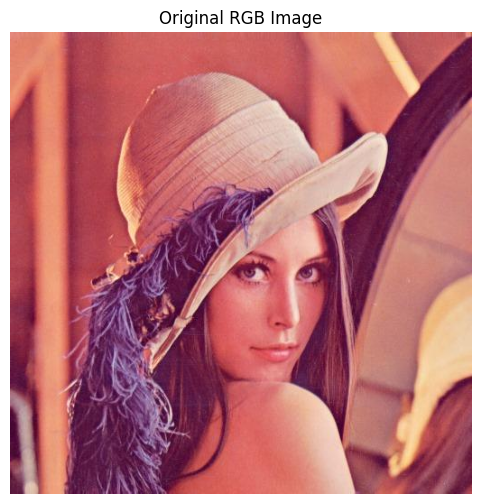

Image Size: 512x512, Channels: 3
Total Pixels: 262144


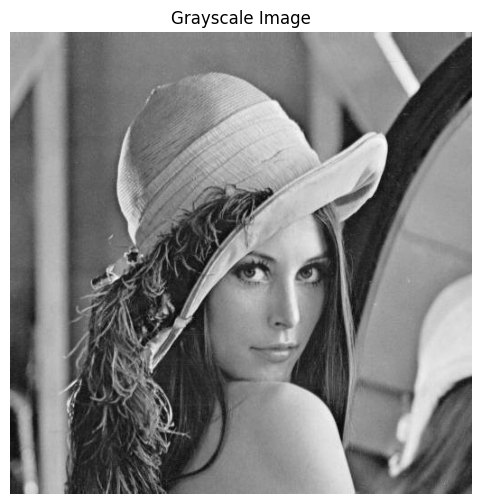

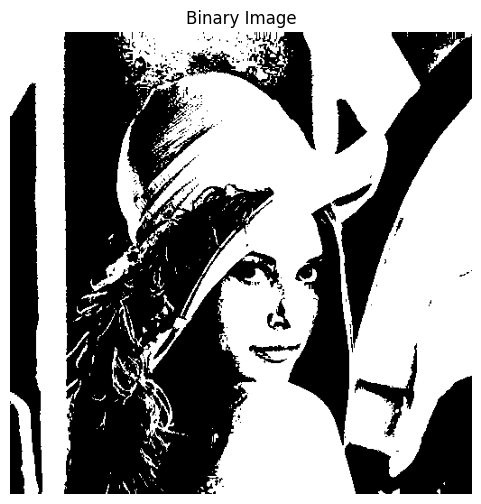

Black Pixel Count: 127949
Size of Image: 512x512


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()


image_path = '/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg'
image = cv2.imread(image_path)


if image is None:
    print(f"Error: Could not load image at path '{image_path}'. Check if the file exists and the path is correct.")
else:

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display_image("Original RGB Image", image_rgb)
    cv2.imwrite("image_rgb.jpg", cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))


    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")


    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")


    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    display_image("Grayscale Image", gray_image, cmap='gray')
    cv2.imwrite("image_gray.jpg", gray_image)


    threshold_value = 127
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    display_image("Binary Image", binary_image, cmap='gray')
    cv2.imwrite("image_binary.jpg", binary_image)

    black_pixel_count = np.sum(binary_image == 0)
    print(f"Black Pixel Count: {black_pixel_count}")
    print(f"Size of Image: {width}x{height}")


Task-2:-Understand and manipulated the properties of an image.

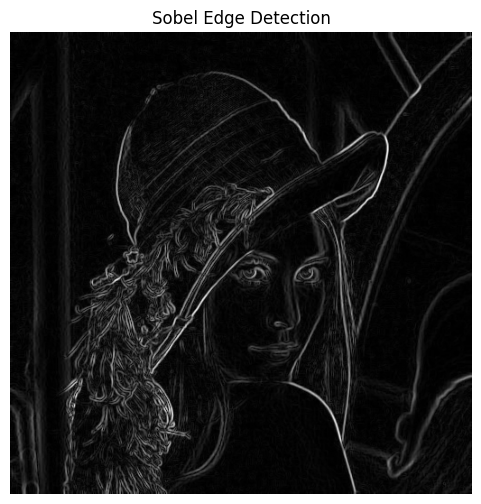

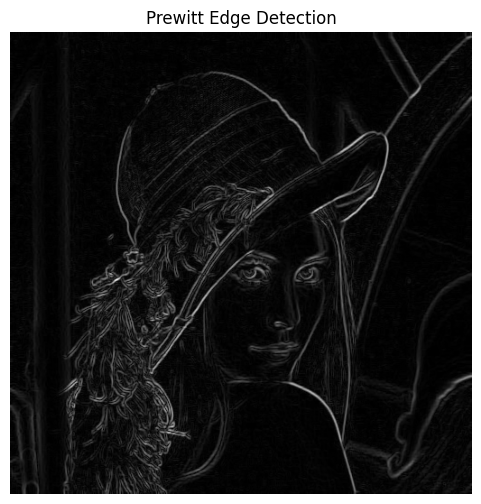

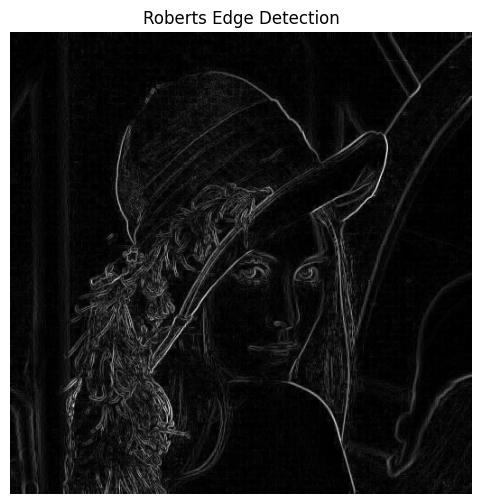

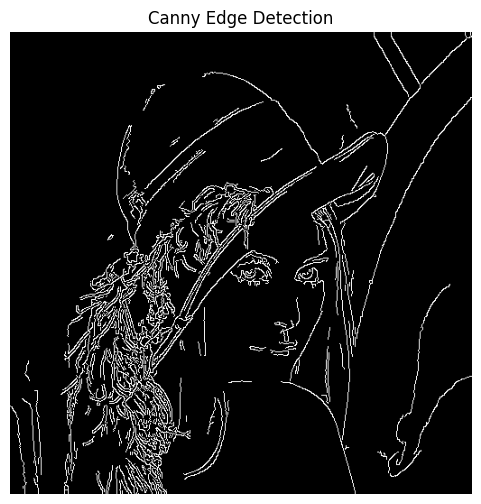

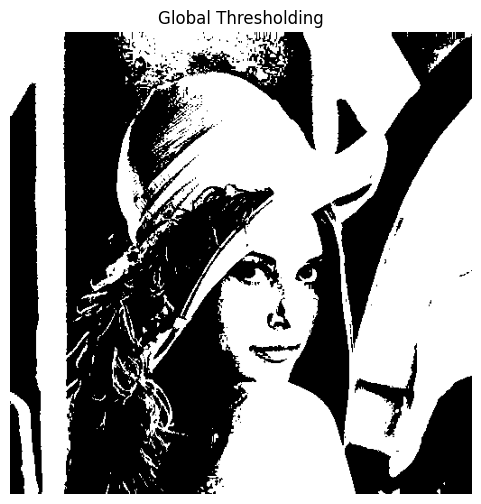

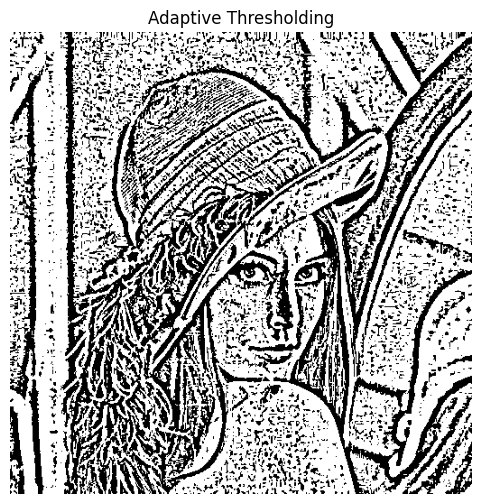

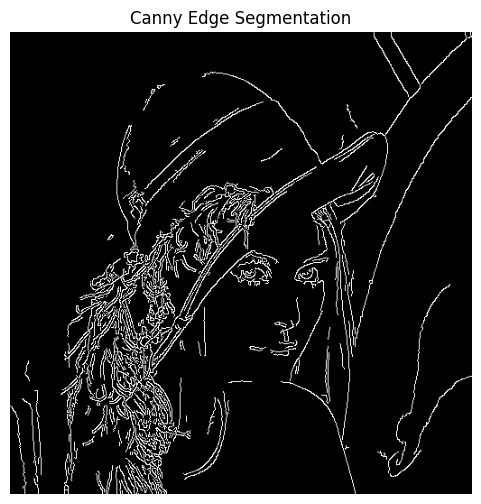

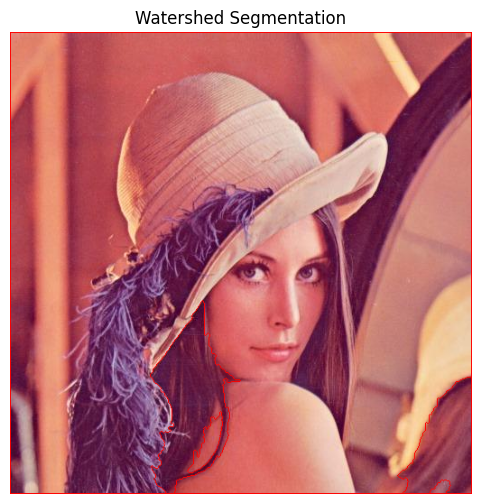

In [ ]:



sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
display_image("Sobel Edge Detection", sobel_combined, cmap='gray')


prewitt_x = prewitt(gray_image)
prewitt_y = prewitt(gray_image, axis=0)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
display_image("Prewitt Edge Detection", prewitt_combined, cmap='gray')


roberts_edges = roberts(gray_image)
display_image("Roberts Edge Detection", roberts_edges, cmap='gray')


canny_edges = cv2.Canny(gray_image, 100, 200)
display_image("Canny Edge Detection", canny_edges, cmap='gray')


_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_image("Global Thresholding", global_thresh, cmap='gray')


adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
display_image("Adaptive Thresholding", adaptive_thresh, cmap='gray')


canny_segment = cv2.Canny(gray_image, 100, 200)
display_image("Canny Edge Segmentation", canny_segment, cmap='gray')


gray_blurred = cv2.GaussianBlur(gray_image, (5,5), 0)
_, binary_thresh = cv2.threshold(gray_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [255, 0, 0]
display_image("Watershed Segmentation", image_rgb)
